# Business Problem


* Apply the simple linear regression model for the data set Salary, 
* Decide whether there is a significant relationship between the variables in the linear regression model of the data set Salary at 5% significance level

In [3]:
################################## Data Analysis & Calculation ##################################
import pandas as pd  
import numpy as np  

############# Data Visualization ###############
import seaborn as sns  
import matplotlib.pyplot as plt 

#################### Model Building & data partition #####################
import statsmodels.api as sm  # statistics + Machine learning --basic 
from sklearn.model_selection import train_test_split ## Sklern -- ML 

import warnings
warnings.filterwarnings('ignore')

# Data Import

In [5]:
new = pd.read_csv(r"C:\Users\komal\Downloads\Salary_Data.csv") 
new.head()

,YearsExperience,Salary
0,1.1,39.343
1,1.3,46.205
2,1.5,37.731
3,2.0,43.525
4,2.2,39.891


In [3]:
new.tail()

,YearsExperience,Salary
25,9.0,105.582
26,9.5,116.969
27,9.6,112.635
28,10.3,122.391
29,10.5,121.872


# Data Type

In [4]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


# Univariate Analysis

In [5]:
new.describe()

,YearsExperience,Salary
count,30.000000,30.00000
mean,5.313333,76.00300
std,2.837888,27.41443
min,1.100000,37.73100
25%,3.200000,56.72075
50%,4.700000,65.23700
75%,7.700000,100.54475
max,10.500000,122.39100


# EDA

#### 1. Identify & Treatment of Outlier 

<Axes: ylabel='YearsExperience'>

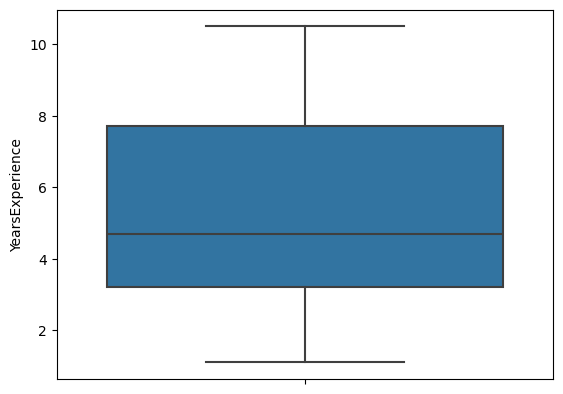

In [6]:
sns.boxplot(y='YearsExperience',data=new)

<Axes: ylabel='Salary'>

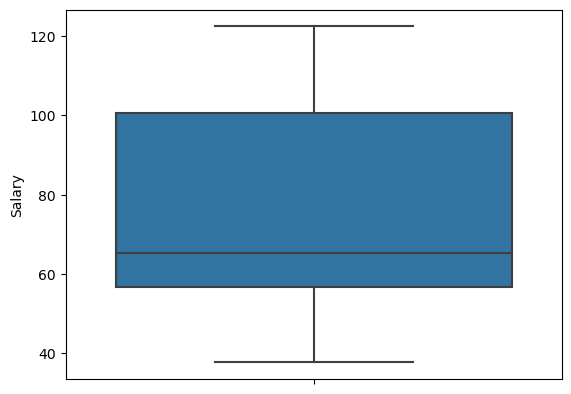

In [7]:
sns.boxplot(y='Salary',data=new)

### 2. Missing Value

In [8]:
new.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

# Data Partition 

In [22]:
x = new[['YearsExperience']]
y = new[['Salary']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size = 0.7,random_state=100)

In [23]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,YearsExperience,Salary
17,5.3,83.088
22,7.9,101.302
11,4.0,55.794
4,2.2,39.891
29,10.5,121.872


# Correlation 

#### Scatter Plot ( Bi-variate Analysis)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

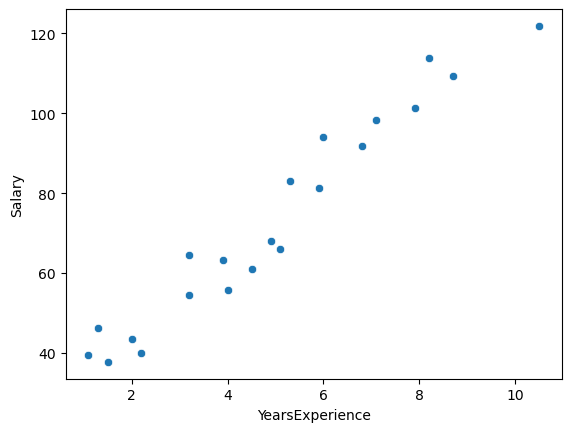

In [24]:
sns.scatterplot(x='YearsExperience', y='Salary',data=train)

#### Correlation Matrix

In [25]:
train.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.974123
Salary,0.974123,1.000000


<Axes: >

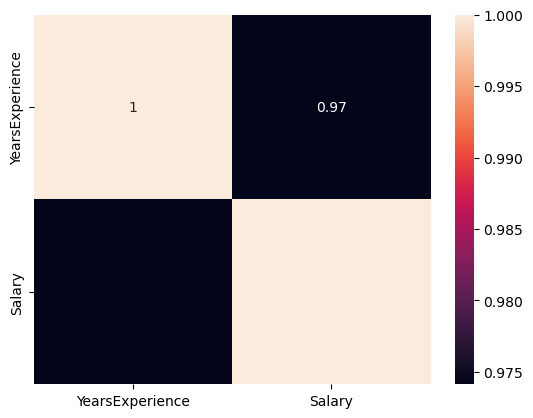

In [28]:
sns.heatmap(train.corr(),annot = True)

* 97% strong Positive correlation between salary & YearsExperience

# Model Building

In [29]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
Model3 = lreg.fit(X_train,y_train) # fit = apply

In [30]:
np.round(Model3.intercept_,4)  # B0

array([25.2029])

In [31]:
np.round(Model3.coef_,4)

array([[9.7312]])

In [32]:
Model3.feature_names_in_

array(['YearsExperience'], dtype=object)

In [33]:
np.round(Model3.score(X_train,y_train),2)

0.95

# Conclusion 

* Y = 25.2029 + 9.7312 * YearsExperience
* Accuracy of Model is 95%, So Model is Good Fit 


# Prediction

In [34]:
train.head()

,YearsExperience,Salary
17,5.3,83.088
22,7.9,101.302
11,4.0,55.794
4,2.2,39.891
29,10.5,121.872


In [37]:
# y = Beta0 + Beta 1 * YearExperience
y  = 25.2029 + 9.7312 * 4.0
y

64.1277

In [39]:
train['fitted_value'] = Model3.predict(X_train) # prediction  or fitted value
train['residual'] = train['Salary'] - train['fitted_value']  # error or residual
train.head()

,YearsExperience,Salary,fitted_value,residual
17,5.3,83.088,76.778268,6.309732
22,7.9,101.302,102.079398,-0.777398
11,4.0,55.794,64.127703,-8.333703
4,2.2,39.891,46.611536,-6.720536
29,10.5,121.872,127.380528,-5.508528


# Loss Function - Train Data

In [45]:
from sklearn.metrics import mean_squared_error 
model_mse = mean_squared_error(train['Salary'],train['fitted_value'])
RMSE = np.sqrt(model_mse)
print("Train RMSE : {:.3} ".format(RMSE)) #21

Train RMSE : 5.81 


# Assumption of Model

* Linearity
* Homoscedasicity -- ( Constant Variance )
* Normality
* Model Error has to be independently identificaly Distibuted

# Linearity

<Axes: xlabel='YearsExperience', ylabel='Salary'>

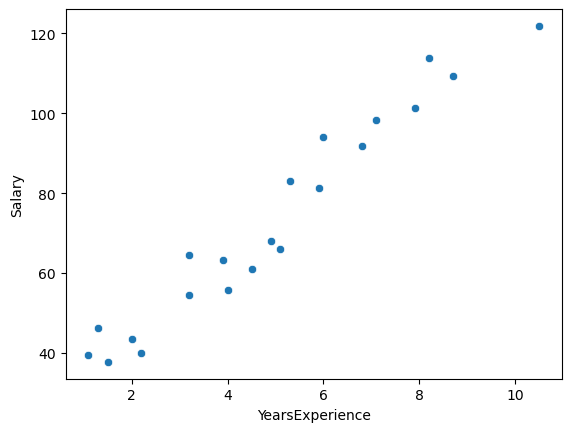

In [40]:
sns.scatterplot(x='YearsExperience', y='Salary',data=train)

# Homoscedasicity ( Constant Variance )

<Axes: xlabel='fitted_value', ylabel='residual'>

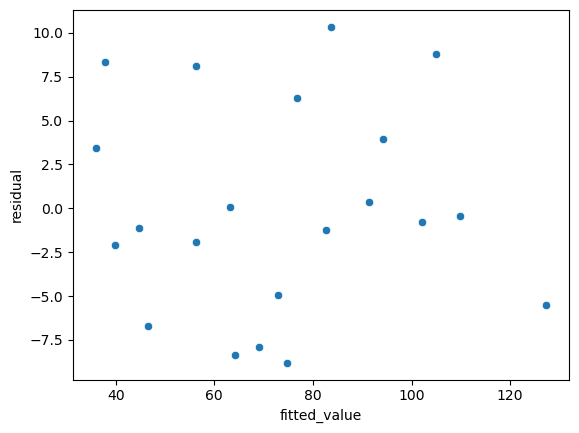

In [41]:
sns.scatterplot(x='fitted_value', y='residual',data=train)

# Normality

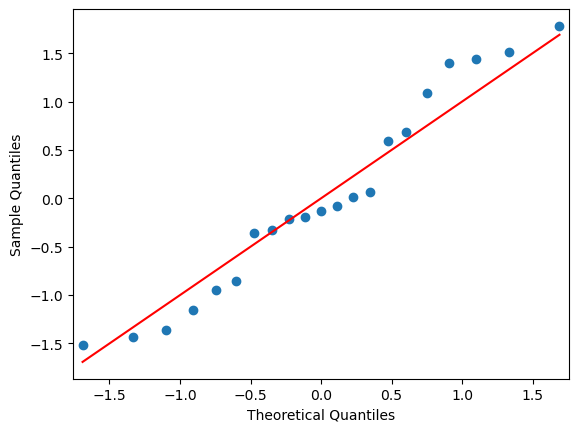

In [42]:
fig = sm.qqplot(train['residual'], fit=True, line='s') 
plt.show()

# Model Error are IID 

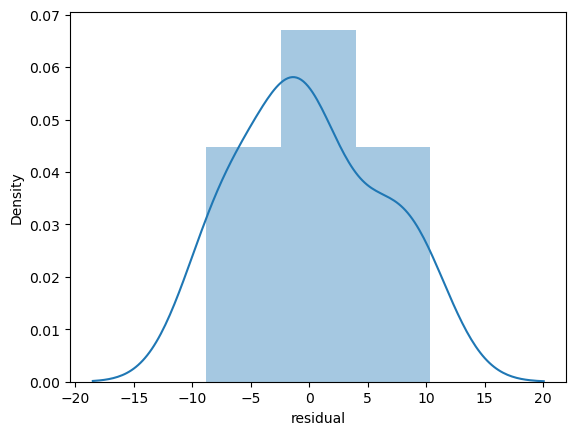

In [43]:
ax = sns.distplot(train.residual) 

# Prediction on Test Data (unseen data)

In [46]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,YearsExperience,Salary
9,3.7,57.189
26,9.5,116.969
28,10.3,122.391
13,4.1,57.081
5,2.9,56.642


In [ ]:
y = 25.2029 + 9.7312 * 3.7 # manual 
y

In [47]:
test['Predicted'] = Model3.predict(X_test)  # model = b0 , b1
test

,YearsExperience,Salary,Predicted
9,3.7,57.189,61.208342
26,9.5,116.969,117.649324
28,10.3,122.391,125.434287
13,4.1,57.081,65.100824
5,2.9,56.642,53.423379
12,4.0,56.957,64.127703
27,9.6,112.635,118.622445
25,9.0,105.582,112.783722
6,3.0,60.150,54.396499


# Train

In [48]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Salary, train.fitted_value)
print('R-Squared score for perfect model is : ', np.round(r2,2)*100)

R-Squared score for perfect model is :  95.0


# Test

In [49]:
from sklearn.metrics import r2_score
r2 = r2_score(test.Salary, test.Predicted)
print('R-Squared  score for model Performance on Test : ', np.round(r2,2)*100)

R-Squared  score for model Performance on Test :  96.0


* Model is good fit on Train dataset
* Model Performance on Test data is also good fit

#### RMSE - Test data

In [50]:
model_mse = mean_squared_error(test['Salary'],test['Predicted'])
model_rmse = np.sqrt(model_mse)
print("RMSE : {:.3}".format(model_rmse)) #9

RMSE : 5.51


# Prediction for Live Data  -- Population

In [51]:
d1 = {'Customer':pd.Series(['vivek','ganesh','aditiya']),
     'YearsExperience':pd.Series([5.4,2.5,0])}
live = pd.DataFrame(d1)
live

,Customer,YearsExperience
0,vivek,5.4
1,ganesh,2.5
2,aditiya,0.0


In [52]:
live['Salary Offer']=np.round(Model3.predict(live[['YearsExperience']]))
live

,Customer,YearsExperience,Salary Offer
0,vivek,5.4,78.0
1,ganesh,2.5,50.0
2,aditiya,0.0,25.0


# Loss Function -- RMSE 

* Train Data :  RMSE <= 10 then model is good fit 

* Test Data :  RMSE <= 10 then model Performance on Test data is good 